1. Importing Packages

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.utils import plot_model

2. Architecture Diagram

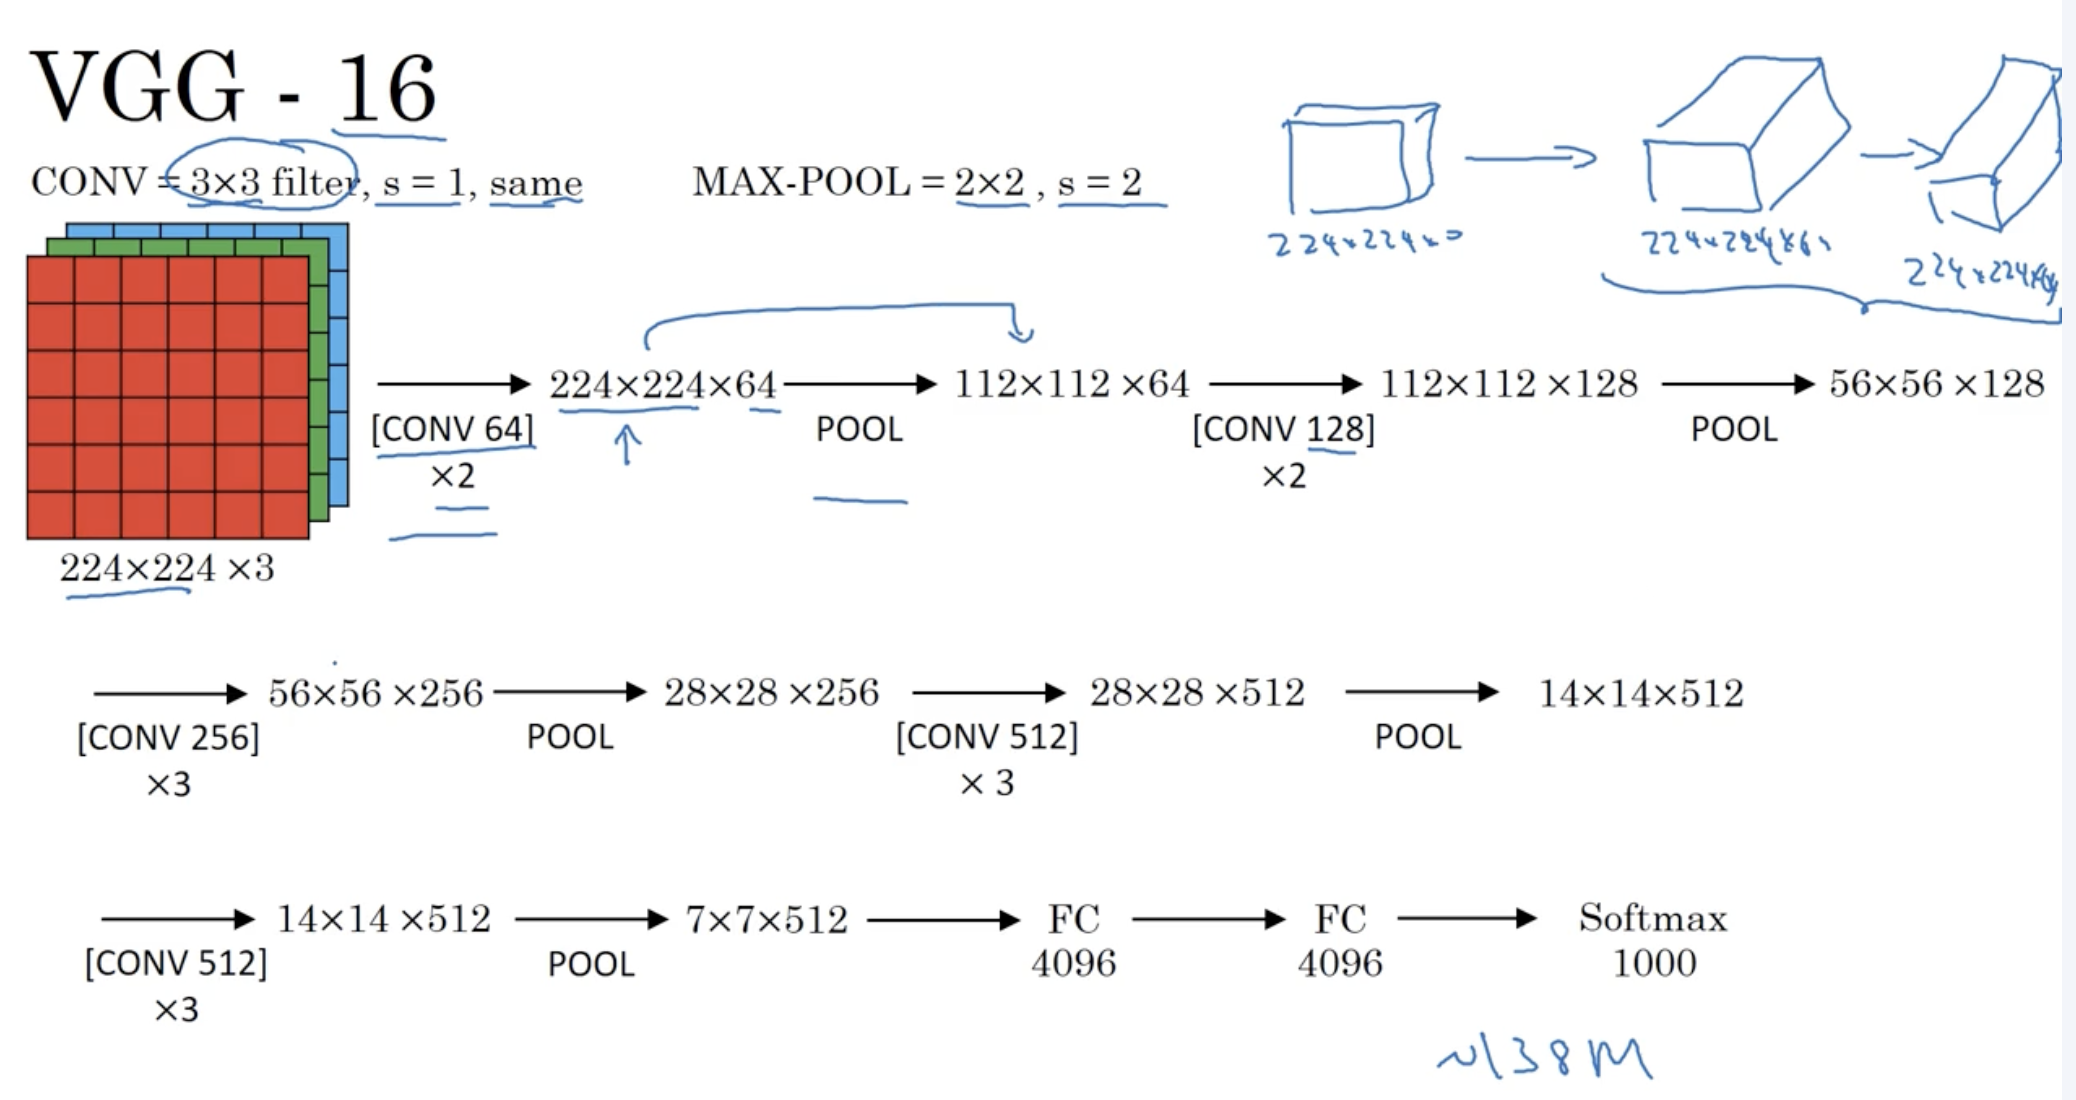

3. Implementing Architecture

In [2]:
def build_vgg16_bn(num_classes: int = 1000, weight_decay: float = 5e-4) -> Model:
    """
    VGG-16 with BatchNorm (VGG16-BN style):
      Conv -> BN -> ReLU, repeated, then MaxPool.
      Dropout kept in FC head.
      L2 weight decay on conv + dense kernels.
    """
    inputs = layers.Input(shape=(224, 224, 3), name="input")

    # ---- Block 1 ----
    x = layers.Conv2D(64, (3, 3), padding="same", use_bias=False, name="conv1_1")(inputs)
    x = layers.BatchNormalization(name="bn1_1")(x)
    x = layers.Activation("relu", name="relu1_1")(x)

    x = layers.Conv2D(64, (3, 3), padding="same", use_bias=False, name="conv1_2")(x)
    x = layers.BatchNormalization(name="bn1_2")(x)
    x = layers.Activation("relu", name="relu1_2")(x)

    x = layers.MaxPooling2D((2, 2), strides=(2, 2), name="pool1")(x)

    # ---- Block 2 ----
    x = layers.Conv2D(128, (3, 3), padding="same", use_bias=False, name="conv2_1")(x)
    x = layers.BatchNormalization(name="bn2_1")(x)
    x = layers.Activation("relu", name="relu2_1")(x)

    x = layers.Conv2D(128, (3, 3), padding="same", use_bias=False, name="conv2_2")(x)
    x = layers.BatchNormalization(name="bn2_2")(x)
    x = layers.Activation("relu", name="relu2_2")(x)

    x = layers.MaxPooling2D((2, 2), strides=(2, 2), name="pool2")(x)

    # ---- Block 3 ----
    x = layers.Conv2D(256, (3, 3), padding="same", use_bias=False, name="conv3_1")(x)
    x = layers.BatchNormalization(name="bn3_1")(x)
    x = layers.Activation("relu", name="relu3_1")(x)

    x = layers.Conv2D(256, (3, 3), padding="same", use_bias=False, name="conv3_2")(x)
    x = layers.BatchNormalization(name="bn3_2")(x)
    x = layers.Activation("relu", name="relu3_2")(x)

    x = layers.Conv2D(256, (3, 3), padding="same", use_bias=False, name="conv3_3")(x)
    x = layers.BatchNormalization(name="bn3_3")(x)
    x = layers.Activation("relu", name="relu3_3")(x)

    x = layers.MaxPooling2D((2, 2), strides=(2, 2), name="pool3")(x)

    # ---- Block 4 ----
    x = layers.Conv2D(512, (3, 3), padding="same", use_bias=False, name="conv4_1")(x)
    x = layers.BatchNormalization(name="bn4_1")(x)
    x = layers.Activation("relu", name="relu4_1")(x)

    x = layers.Conv2D(512, (3, 3), padding="same", use_bias=False, name="conv4_2")(x)
    x = layers.BatchNormalization(name="bn4_2")(x)
    x = layers.Activation("relu", name="relu4_2")(x)

    x = layers.Conv2D(512, (3, 3), padding="same", use_bias=False, name="conv4_3")(x)
    x = layers.BatchNormalization(name="bn4_3")(x)
    x = layers.Activation("relu", name="relu4_3")(x)

    x = layers.MaxPooling2D((2, 2), strides=(2, 2), name="pool4")(x)

    # ---- Block 5 ----
    x = layers.Conv2D(512, (3, 3), padding="same", use_bias=False, name="conv5_1")(x)
    x = layers.BatchNormalization(name="bn5_1")(x)
    x = layers.Activation("relu", name="relu5_1")(x)

    x = layers.Conv2D(512, (3, 3), padding="same", use_bias=False, name="conv5_2")(x)
    x = layers.BatchNormalization(name="bn5_2")(x)
    x = layers.Activation("relu", name="relu5_2")(x)

    x = layers.Conv2D(512, (3, 3), padding="same", use_bias=False, name="conv5_3")(x)
    x = layers.BatchNormalization(name="bn5_3")(x)
    x = layers.Activation("relu", name="relu5_3")(x)

    x = layers.MaxPooling2D((2, 2), strides=(2, 2), name="pool5")(x)

    # ---- Classifier ----
    x = layers.Flatten(name="flatten")(x)

    x = layers.Dense(4096, name="fc6")(x)
    x = layers.BatchNormalization(name="bn6")(x)
    x = layers.Activation("relu", name="relu6")(x)
    x = layers.Dropout(0.5, name="drop6")(x)

    x = layers.Dense(4096, name="fc7")(x)
    x = layers.BatchNormalization(name="bn7")(x)
    x = layers.Activation("relu", name="relu7")(x)
    x = layers.Dropout(0.5, name="drop7")(x)

    x = layers.Dense(num_classes, name="fc8")(x)
    outputs = layers.Activation("softmax", name="prob")(x)

    return Model(inputs, outputs, name="vgg16_bn")

In [3]:
model = build_vgg16_bn()

2026-02-22 16:06:04.035768: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2026-02-22 16:06:04.035805: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2026-02-22 16:06:04.035808: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.92 GB
I0000 00:00:1771738564.035821 1207633 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1771738564.035845 1207633 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
model.summary()

Model: "vgg16_bn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_1 (Conv2D)                │ (None, 224, 224, 64)   │         1,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn1_1 (BatchNormalization)      │ (None, 224, 224, 64)   │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu1_1 (Activation)            │ (None, 224, 224, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_2 (Conv2D)                │ (None, 224, 224, 64)   │        36,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn1_2 (BatchNormalization)      │ (None, 224, 224, 64)   │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu1_2 (Activation)            │ (None, 224, 224, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2_1 (Conv2D)                │ (None, 112, 112, 128)  │        73,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn2_1 (BatchNormalization)      │ (None, 112, 112, 128)  │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu2_1 (Activation)            │ (None, 112, 112, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2_2 (Conv2D)                │ (None, 112, 112, 128)  │       147,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn2_2 (BatchNormalization)      │ (None, 112, 112, 128)  │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu2_2 (Activation)            │ (None, 112, 112, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3_1 (Conv2D)                │ (None, 56, 56, 256)    │       294,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn3_1 (BatchNormalization)      │ (None, 56, 56, 256)    │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu3_1 (Activation)            │ (None, 56, 56, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3_2 (Conv2D)                │ (None, 56, 56, 256)    │       589,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn3_2 (BatchNormalization)      │ (None, 56, 56, 256)    │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu3_2 (Activation)            │ (None, 56, 56, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3_3 (Conv2D)                │ (None, 56, 56, 256)    │       589,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn3_3 (BatchNormalization)      │ (None, 56, 56, 256)    │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu3_3 (Activation)            │ (None, 56, 56, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool3 (MaxPooling2D)            │ (None, 28, 28, 256)    │             

 Total params: 138,402,984 (527.97 MB)

 Trainable params: 138,378,152 (527.87 MB)

 Non-trainable params: 24,832 (97.00 KB)

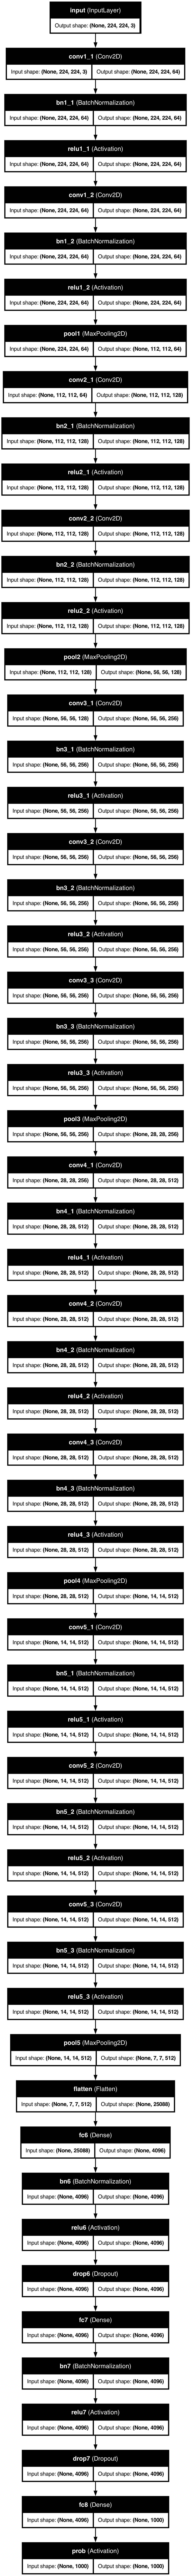

In [5]:
plot_model(model, to_file="model.png",show_layer_names=True,show_shapes=True, rankdir='TB')

In [6]:
model.compile(
    optimizer=tf.keras.optimizers.AdamW(
        learning_rate=1e-3,
        weight_decay=1e-4, 
    ),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

References : 

CNN course by Andrew NG.